# K-Means Clustering : Cars Data

Let's look at a clustering example.

Here, we are going to load the mtcars dataset. This has some stats on different models of cars.  Here, we will load the CSV file as a pandas dataframe, and view it.

And here is a [spreadsheet](WSSSE-versus-k.xlsx) for you record K and WSSSE.

## Step 1: Load the Data

In [1]:
import os
import urllib.request

data_location = "../data/cars/mtcars_header.csv"
data_url = 'https://elephantscale-public.s3.amazonaws.com/data/cars/mtcars_header.csv'

if not os.path.exists (data_location):
    data_location = os.path.basename(data_location)
    if not os.path.exists(data_location):
        print("Downloading : ", data_url)
        urllib.request.urlretrieve(data_url, data_location)
print('data_location:', data_location)

data_location: ../data/cars/mtcars_header.csv


In [2]:
import pandas as pd

dataset = pd.read_csv(data_location)
dataset.sample(10)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4
10,Merc 280C,17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
21,Dodge Challenger,15.5,8,318.0,150,2.76,3.520,16.87,0,0,3,2
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8


## Step 2: Creating Vectors

Now that we have ourselves a dataframe, let's work on turning it into vectors.  We're going to vectorize 2 columns:

1. MPG
2. Number of cylinders.


In [3]:
## TODO: create an mpg_cyl dataframe with just 'model', 'mpg', and 'cyl'
dataset2 = dataset [['model', 'mpg', 'cyl']]

x = dataset2[["mpg", "cyl"]]
x.sample(10)

,mpg,cyl
10,17.8,6
31,21.4,4
8,22.8,4
23,13.3,8
24,19.2,8
30,15.0,8
25,27.3,4
11,16.4,8
9,19.2,6
15,10.4,8


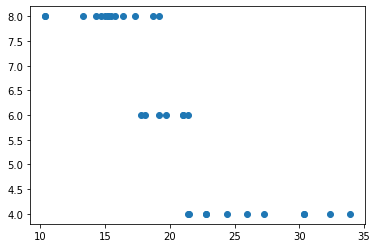

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x['mpg'], x['cyl'], marker='o')
plt.show()

## Step 3: Running Kmeans

Now it's time to run kmeans on the resultant dataframe.  We don't know what value of k to use, so let's just start with k=2.  This means we will cluster into two groups.

We will fit a model to the data, and then train it.



In [5]:
from sklearn.cluster import KMeans

## TODO: Instantiate K-means model with value k=2
kmeans = KMeans(n_clusters=2, random_state=0)

model = kmeans.fit(x)

model

KMeans(n_clusters=2, random_state=0)

In [6]:
## TODO: calculate WSSSE by calling computeCost on dataframe
## Hint : inertia_
wssse = model.inertia_

print("k=2, wssse = ", wssse)

k=2, wssse =  416.48425120772936


The WSSSE for this is not particularly good.  We will probably need to change k.

Let's take a look at the transformed dataset.  Notice the new column "prediction."


In [7]:
## transform the dataset from the model
model.labels_ # these are the cluster ids

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0], dtype=int32)

In [8]:
### TODO: Add new column to DF with cluster labels 
dataset2['cluster'] = model.labels_
dataset2

<ipython-input-8-f09d8cfaf3aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2['cluster'] = model.labels_


,model,mpg,cyl,cluster
0,Mazda RX4,21.0,6,0
1,Mazda RX4 Wag,21.0,6,0
2,Datsun 710,22.8,4,1
3,Hornet 4 Drive,21.4,6,0
4,Hornet Sportabout,18.7,8,0
5,Valiant,18.1,6,0
6,Duster 360,14.3,8,0
7,Merc 240D,24.4,4,1
8,Merc 230,22.8,4,1
9,Merc 280,19.2,6,0


Notice what we have here.  We have two clusters. One is smaller, fuel efficient cars like the Fiat and the Corolla (remember, we cluster on two variables only: MPG and cylinders).  The other is for basically oll other cars.  Probably, we can get better results here with a differnet value of k.

In [9]:
dataset2.sort_values(by=['cluster', 'mpg'])

,model,mpg,cyl,cluster
14,Cadillac Fleetwood,10.4,8,0
15,Lincoln Continental,10.4,8,0
23,Camaro Z28,13.3,8,0
6,Duster 360,14.3,8,0
16,Chrysler Imperial,14.7,8,0
30,Maserati Bora,15.0,8,0
13,Merc 450SLC,15.2,8,0
22,AMC Javelin,15.2,8,0
21,Dodge Challenger,15.5,8,0
28,Ford Pantera L,15.8,8,0


### Set K=3

In [10]:
from sklearn.cluster import KMeans

## TODO: Instantiate K-means model with value k=2
kmeans = KMeans(n_clusters=3, random_state=0)

model = kmeans.fit(x)

wssse = model.inertia_
print ("k=3, wssse =",wssse)

k=3, wssse = 169.4053571428571


In [11]:
dataset2['cluster'] = model.labels_
dataset2.sort_values(by=['cluster', 'mpg'])

<ipython-input-11-74e2221263fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2['cluster'] = model.labels_


,model,mpg,cyl,cluster
14,Cadillac Fleetwood,10.4,8,0
15,Lincoln Continental,10.4,8,0
23,Camaro Z28,13.3,8,0
6,Duster 360,14.3,8,0
16,Chrysler Imperial,14.7,8,0
30,Maserati Bora,15.0,8,0
13,Merc 450SLC,15.2,8,0
22,AMC Javelin,15.2,8,0
21,Dodge Challenger,15.5,8,0
28,Ford Pantera L,15.8,8,0


This is a much better result for WSSSE (lower is better).

## Step 4: Hyperparameter tuning

Let's try iterating and plotting over values of k, so we can practice using the elbow method.

**Q ==> Why is WSSSE almost zero when k=32?**

In [12]:
kvals = []
wssses = []

# TODO : Run k from 2 to 32
for k in range(2,32):
    kmeans = KMeans(n_clusters=k, random_state=0)
    model = kmeans.fit(x)
    wssse = model.inertia_
    print ("k={},  wssse={}".format(k,wssse))
    kvals.append(k)
    wssses.append(wssse)

k=2,  wssse=416.48425120772936
k=3,  wssse=169.4053571428571
k=4,  wssse=107.64864285714285
k=5,  wssse=70.1278650793651
k=6,  wssse=43.601865079365076
k=7,  wssse=31.793055555555554
k=8,  wssse=24.21472222222222
k=9,  wssse=18.228888888888886
k=10,  wssse=14.301309523809525
k=11,  wssse=10.755833333333323
k=12,  wssse=8.179166666666662
k=13,  wssse=5.968333333333331
k=14,  wssse=4.015000000000004
k=15,  wssse=2.890000000000004
k=16,  wssse=2.045000000000003
k=17,  wssse=1.2836666666666687
k=18,  wssse=0.7941666666666645
k=19,  wssse=0.5583333333333325
k=20,  wssse=0.43333333333333246
k=21,  wssse=0.30833333333333246
k=22,  wssse=0.20166666666666644
k=23,  wssse=0.12166666666666705
k=24,  wssse=0.07666666666666683
k=25,  wssse=0.03166666666666662
k=26,  wssse=0.005000000000000142
k=27,  wssse=0.0


<ipython-input-12-58455c86923e>:7: ConvergenceWarning: Number of distinct clusters (27) found smaller than n_clusters (28). Possibly due to duplicate points in X.
  model = kmeans.fit(x)


k=28,  wssse=0.0


<ipython-input-12-58455c86923e>:7: ConvergenceWarning: Number of distinct clusters (27) found smaller than n_clusters (29). Possibly due to duplicate points in X.
  model = kmeans.fit(x)


k=29,  wssse=0.0


<ipython-input-12-58455c86923e>:7: ConvergenceWarning: Number of distinct clusters (27) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  model = kmeans.fit(x)


k=30,  wssse=0.0
k=31,  wssse=0.0


<ipython-input-12-58455c86923e>:7: ConvergenceWarning: Number of distinct clusters (27) found smaller than n_clusters (31). Possibly due to duplicate points in X.
  model = kmeans.fit(x)


In [13]:
df = pd.DataFrame({'k': kvals, 'wssse':wssses})
df

,k,wssse
0,2,416.484251
1,3,169.405357
2,4,107.648643
3,5,70.127865
4,6,43.601865
5,7,31.793056
6,8,24.214722
7,9,18.228889
8,10,14.301310
9,11,10.755833


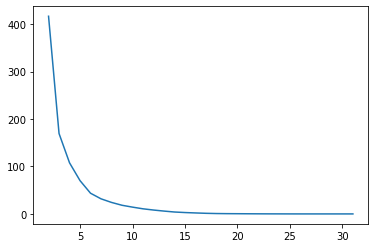

In [14]:
%matplotlib inline
from matplotlib import pyplot

## TODO: plot the values of k as the X axis versus the costs (WSSSE) as the y axis
## Hint  : x=kvals,  y=wssses
pyplot.plot(kvals, wssses)
pyplot.show()

Using the Elbow method, what would be a good value of k?
